# Import Libraries

In [111]:
import warnings

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from xgboost import XGBRegressor
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV

# Ignore warnings
warnings.filterwarnings('ignore')

# Load Data

In [56]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

X_train = df_train.drop(['SalePrice'], axis=1)
X_train = X_train.drop(X_train.columns[0], axis=1)
y_train = df_train['SalePrice']

X_test = df_test.copy()

print(X_train.shape)
print(X_test.shape)

print(X_train.head())
print(X_test.head())

(1460, 79)
(1459, 80)
   MSSubClass   MSZoning   LotFrontage   LotArea   Street   Alley   LotShape   \
0           60  RL         65                8450  Pave     NA      Reg         
1           20  RL         80                9600  Pave     NA      Reg         
2           60  RL         68               11250  Pave     NA      IR1         
3           70  RL         60                9550  Pave     NA      IR1         
4           60  RL         84               14260  Pave     NA      IR1         

   LandContour   Utilities   LotConfig   ... ScreenPorch  PoolArea   PoolQC   \
0  Lvl           AllPub      Inside      ...            0         0  NA        
1  Lvl           AllPub      FR2         ...            0         0  NA        
2  Lvl           AllPub      Inside      ...            0         0  NA        
3  Lvl           AllPub      Corner      ...            0         0  NA        
4  Lvl           AllPub      FR2         ...            0         0  NA        

   Fence  

# EDA

In [57]:
print(X_train.info())
print(X_train.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   MSSubClass      1460 non-null   int64 
 1   MSZoning        1460 non-null   object
 2   LotFrontage     1460 non-null   object
 3   LotArea         1460 non-null   int64 
 4   Street          1460 non-null   object
 5   Alley           1460 non-null   object
 6   LotShape        1460 non-null   object
 7   LandContour     1460 non-null   object
 8   Utilities       1460 non-null   object
 9   LotConfig       1460 non-null   object
 10  LandSlope       1460 non-null   object
 11  Neighborhood    1460 non-null   object
 12  Condition1      1460 non-null   object
 13  Condition2      1460 non-null   object
 14  BldgType        1460 non-null   object
 15  HouseStyle      1460 non-null   object
 16  OverallQual     1460 non-null   int64 
 17  OverallCond     1460 non-null   int64 
 18  YearBuil

## Choose Variables to Work

In [58]:
print(X_train.columns)

Index(['MSSubClass ', 'MSZoning ', 'LotFrontage ', 'LotArea ', 'Street ',
       'Alley ', 'LotShape ', 'LandContour ', 'Utilities ', 'LotConfig ',
       'LandSlope ', 'Neighborhood ', 'Condition1 ', 'Condition2 ',
       'BldgType ', 'HouseStyle ', 'OverallQual ', 'OverallCond ',
       'YearBuilt ', 'YearRemodAdd ', 'RoofStyle ', 'RoofMatl ',
       'Exterior1st ', 'Exterior2nd ', 'MasVnrType ', 'MasVnrArea ',
       'ExterQual ', 'ExterCond ', 'Foundation ', 'BsmtQual ', 'BsmtCond ',
       'BsmtExposure ', 'BsmtFinType1 ', 'BsmtFinSF1 ', 'BsmtFinType2 ',
       'BsmtFinSF2 ', 'BsmtUnfSF ', 'TotalBsmtSF ', 'Heating ', 'HeatingQC ',
       'CentralAir ', 'Electrical ', '1stFlrSF ', '2ndFlrSF ', 'LowQualFinSF ',
       'GrLivArea ', 'BsmtFullBath ', 'BsmtHalfBath ', 'FullBath ',
       'HalfBath ', 'BedroomAbvGr ', 'KitchenAbvGr ', 'KitchenQual ',
       'TotRmsAbvGrd ', 'Functional ', 'Fireplaces ', 'FireplaceQu ',
       'GarageType ', 'GarageYrBlt ', 'GarageFinish ', 'GarageCars '

In [59]:
columns = ['LotArea ', 'Alley ', 'Neighborhood ', 'LandContour ', 'OverallQual ', 'OverallCond ', 'YearBuilt ', 'HeatingQC ', 'YrSold ']
X_train_filtered = X_train[columns]

print(X_train_filtered.isnull().sum()) # data set has no null values in the variables we are interested in, no need to imput wory about missing values
print(X_train_filtered.describe())

LotArea          0
Alley            0
Neighborhood     0
LandContour      0
OverallQual      0
OverallCond      0
YearBuilt        0
HeatingQC        0
YrSold           0
dtype: int64
            LotArea   OverallQual   OverallCond    YearBuilt       YrSold 
count    1460.000000   1460.000000   1460.000000  1460.000000  1460.000000
mean    10516.828082      6.099315      5.575342  1971.267808  2007.815753
std      9981.264932      1.382997      1.112799    30.202904     1.328095
min      1300.000000      1.000000      1.000000  1872.000000  2006.000000
25%      7553.500000      5.000000      5.000000  1954.000000  2007.000000
50%      9478.500000      6.000000      5.000000  1973.000000  2008.000000
75%     11601.500000      7.000000      6.000000  2000.000000  2009.000000
max    215245.000000     10.000000      9.000000  2010.000000  2010.000000


In [60]:
print(X_train_filtered.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   LotArea        1460 non-null   int64 
 1   Alley          1460 non-null   object
 2   Neighborhood   1460 non-null   object
 3   LandContour    1460 non-null   object
 4   OverallQual    1460 non-null   int64 
 5   OverallCond    1460 non-null   int64 
 6   YearBuilt      1460 non-null   int64 
 7   HeatingQC      1460 non-null   object
 8   YrSold         1460 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 102.8+ KB
None


## Data Visualisation

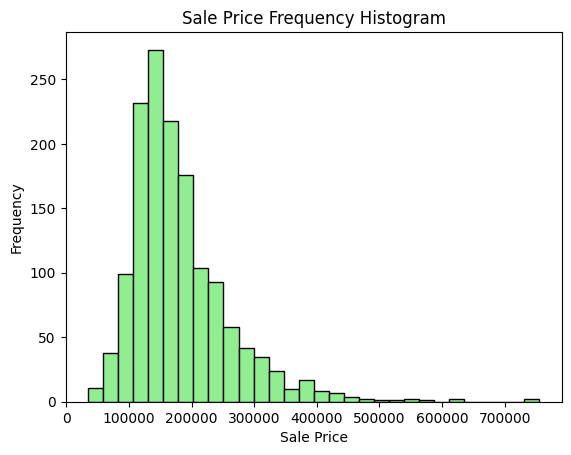

In [61]:
plt.hist(y_train, bins=30, color='lightgreen', edgecolor='black')

plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.title('Sale Price Frequency Histogram')

plt.show()

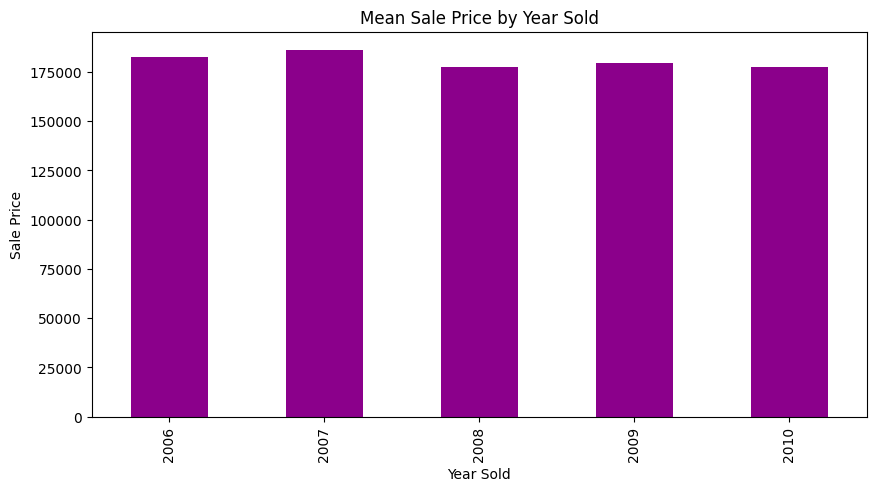

In [62]:
df = X_train_filtered.copy()
df['SalePrice '] = y_train

mean_prices = df.groupby('YrSold ')['SalePrice '].mean()

plt.figure(figsize = (10, 5))

mean_prices.plot(kind='bar', color='darkmagenta')
 
plt.xlabel("Year Sold")
plt.ylabel("Sale Price")
plt.title("Mean Sale Price by Year Sold")

plt.show()

- As we can see from the plot above, there is no significant difference at the mean sale pricec by years. Therefore, I am going to drop YrSold column.

In [63]:
X_train_filtered = X_train_filtered.drop(['YrSold '], axis=1)

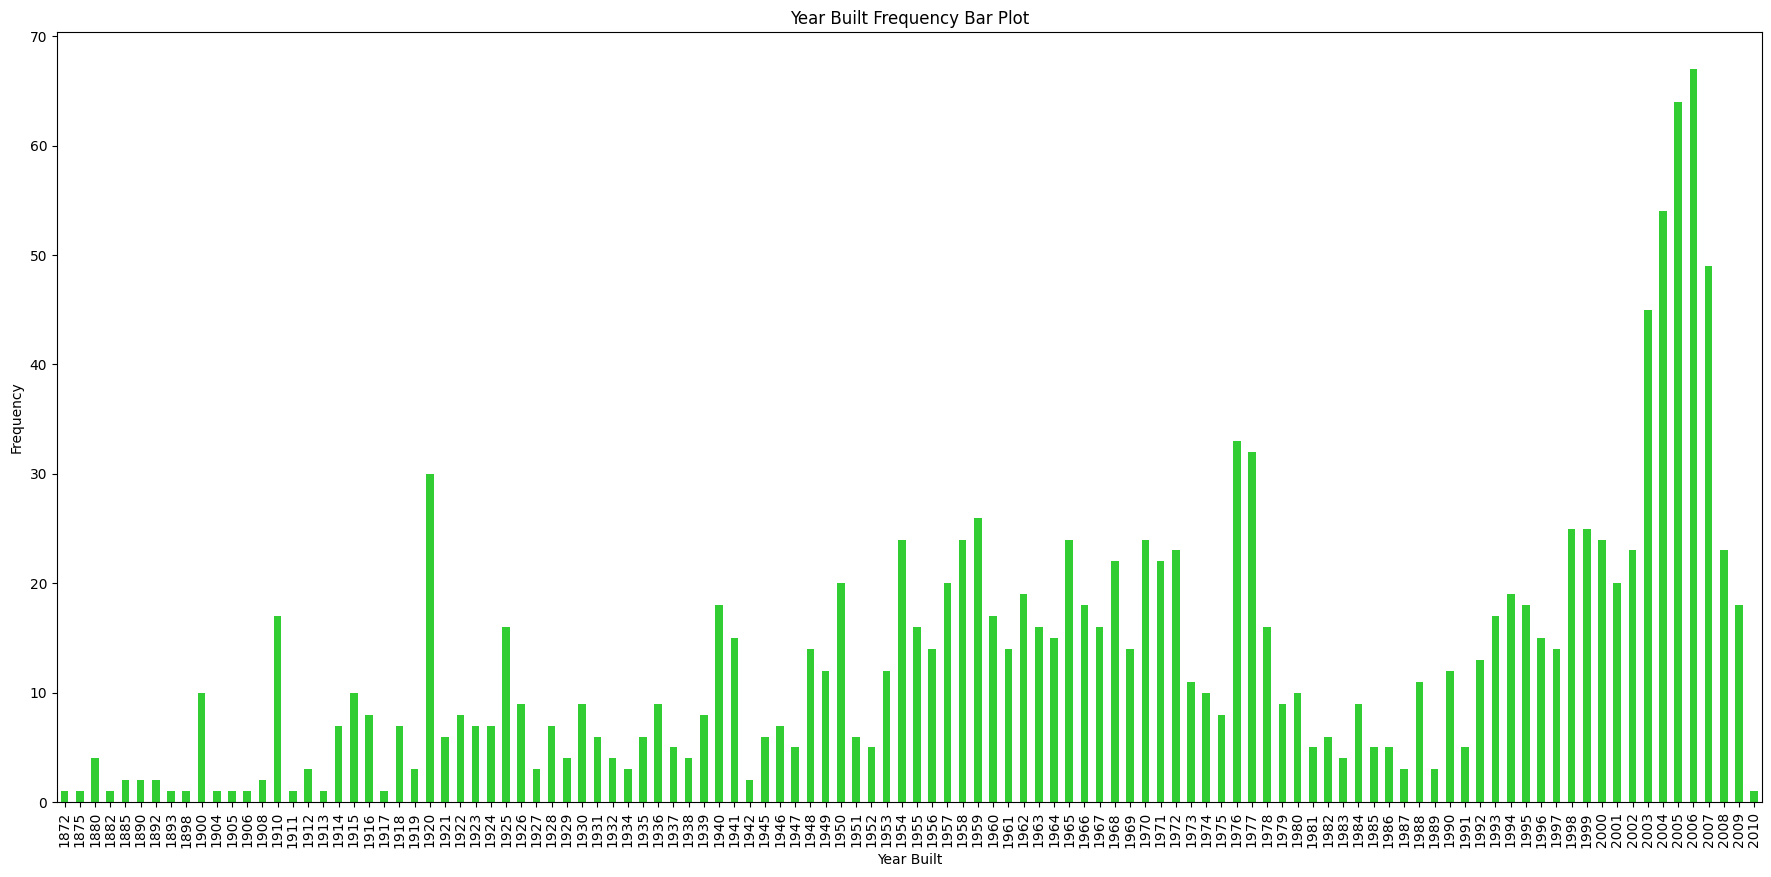

In [64]:
year_built_counts = X_train_filtered['YearBuilt '].value_counts()
year_built_counts.sort_index(inplace=True)

plt.figure(figsize = (22, 10))

year_built_counts.plot(kind='bar', color='limegreen')

plt.xlabel("Year Built")
plt.ylabel("Frequency")
plt.title("Year Built Frequency Bar Plot")

plt.show()

- Since there are not enough data by each year I am going to group them in preprocessing

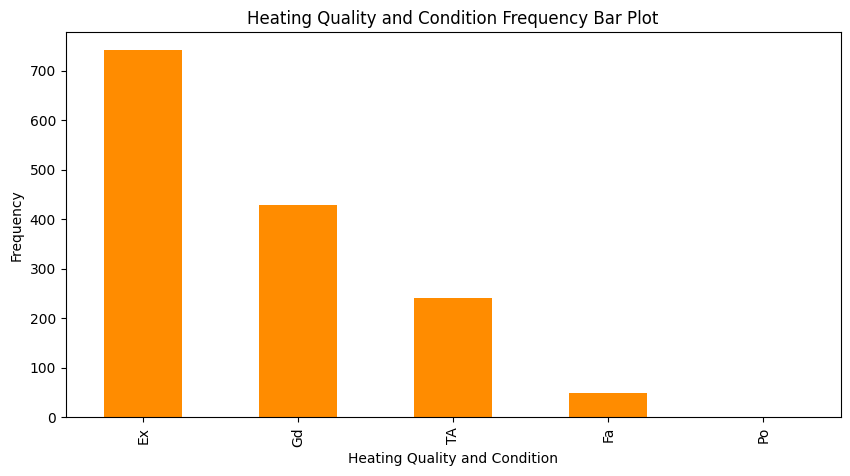

In [65]:
heating_qc_counts = X_train_filtered['HeatingQC '].value_counts()

plt.figure(figsize=(10, 5))

order = ['Ex', 'Gd', 'TA', 'Fa', 'Po']
heating_qc_counts.plot(kind='bar', color='darkorange')

plt.xticks(range(len(order)), order)
plt.xlabel("Heating Quality and Condition")
plt.ylabel("Frequency")
plt.title("Heating Quality and Condition Frequency Bar Plot")

plt.show()

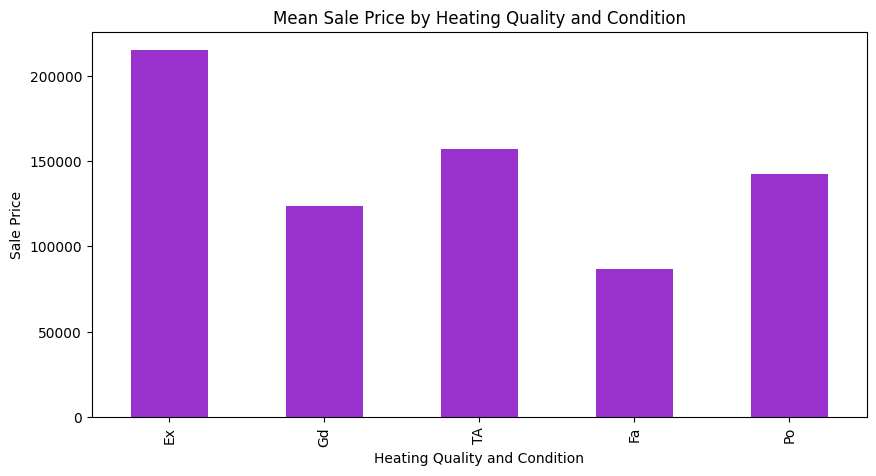

In [66]:
mean_prices = df.groupby('HeatingQC ')['SalePrice '].mean()

plt.figure(figsize = (10, 5))

mean_prices.plot(kind='bar', color='darkorchid')

plt.xticks(range(len(order)), order)
plt.xlabel("Heating Quality and Condition")
plt.ylabel("Sale Price")
plt.title("Mean Sale Price by Heating Quality and Condition")

plt.show()

In [67]:
print(df[df['HeatingQC '] == 'Po        '].shape) # only 1 observation with HeatingQC = Po, we can drop this observation

(1, 10)


In [68]:
indices = df.loc[df['HeatingQC '] == 'Po        '].index

X_train_filtered = X_train_filtered.drop(indices)
df = df.drop(indices)
y_train = y_train.drop(indices)

In [69]:
print(X_train_filtered.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1459 entries, 0 to 1459
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   LotArea        1459 non-null   int64 
 1   Alley          1459 non-null   object
 2   Neighborhood   1459 non-null   object
 3   LandContour    1459 non-null   object
 4   OverallQual    1459 non-null   int64 
 5   OverallCond    1459 non-null   int64 
 6   YearBuilt      1459 non-null   int64 
 7   HeatingQC      1459 non-null   object
dtypes: int64(4), object(4)
memory usage: 102.6+ KB
None


In [70]:
print(df['Alley '].value_counts())

Alley 
NA        1368
Grvl        50
Pave        41
Name: count, dtype: int64


Text(0.5, 1.0, 'Mean Sale Price by Alley Access')

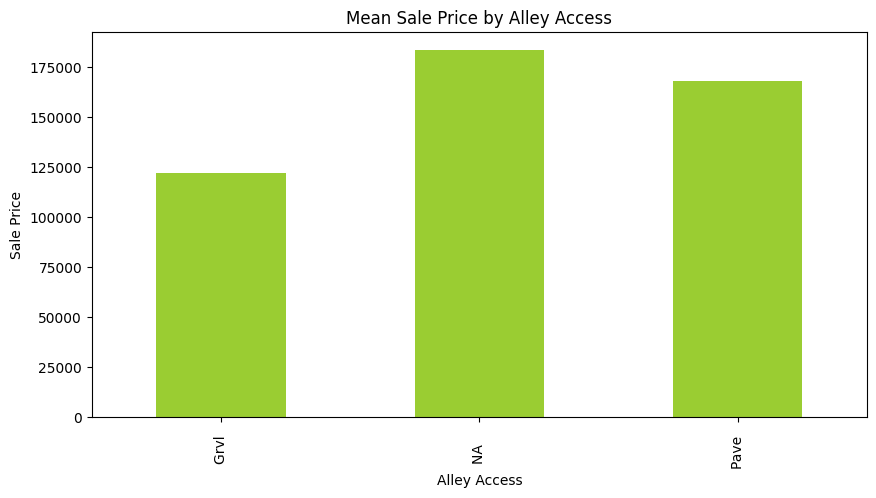

In [71]:
mean_prices = df.groupby('Alley ')['SalePrice '].mean()

plt.figure(figsize = (10, 5))

mean_prices.plot(kind='bar', color='yellowgreen')

plt.xlabel("Alley Access")
plt.ylabel("Sale Price")
plt.title("Mean Sale Price by Alley Access")

- There is not enough data about Gravel and Pave alley access, also Pave and NA means are close to each other, I am going to drop that variable

In [72]:
X_train_filtered = X_train_filtered.drop(['Alley '], axis=1)
df = df.drop(['Alley '], axis=1)

Text(0.5, 1.0, 'Mean Sale Price by Lot Area')

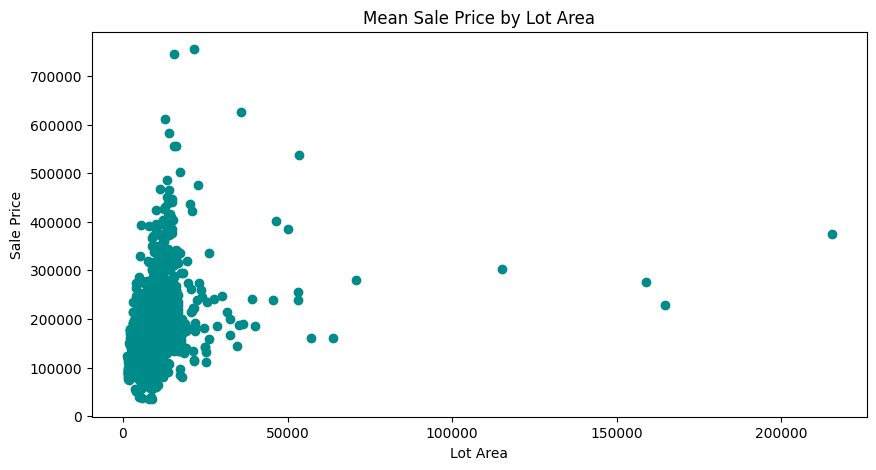

In [73]:
plt.figure(figsize = (10, 5))

plt.scatter(df['LotArea '], df['SalePrice '], color='darkcyan')

plt.xlabel("Lot Area")
plt.ylabel("Sale Price")
plt.title("Mean Sale Price by Lot Area")

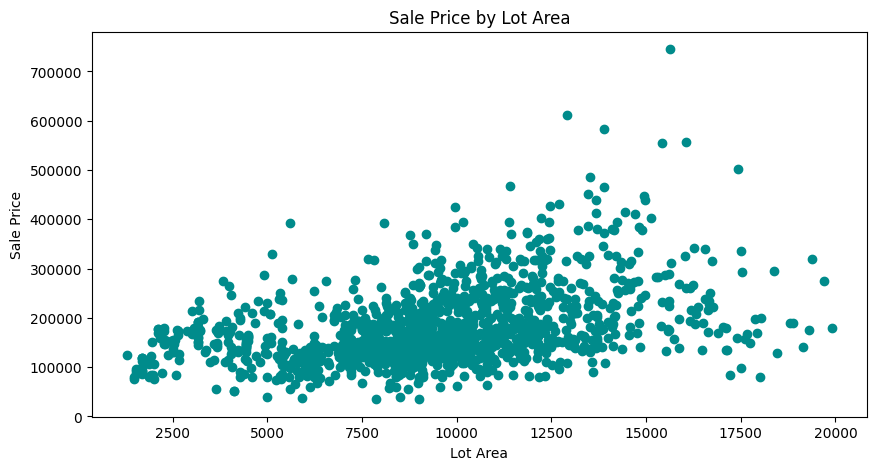

In [74]:
# There are extreme values in the Lot Area variable, we can filter out the observations with Lot Area greater than 20,000 square feet
df_filtered = df[df['LotArea '] < 20000]

plt.figure(figsize = (10, 5))
plt.scatter(df_filtered['LotArea '], df_filtered['SalePrice '], color='darkcyan')

plt.xlabel("Lot Area")
plt.ylabel("Sale Price")
plt.title("Sale Price by Lot Area")

plt.show()

Text(0.5, 1.0, 'Lot Area Frequency Histogram')

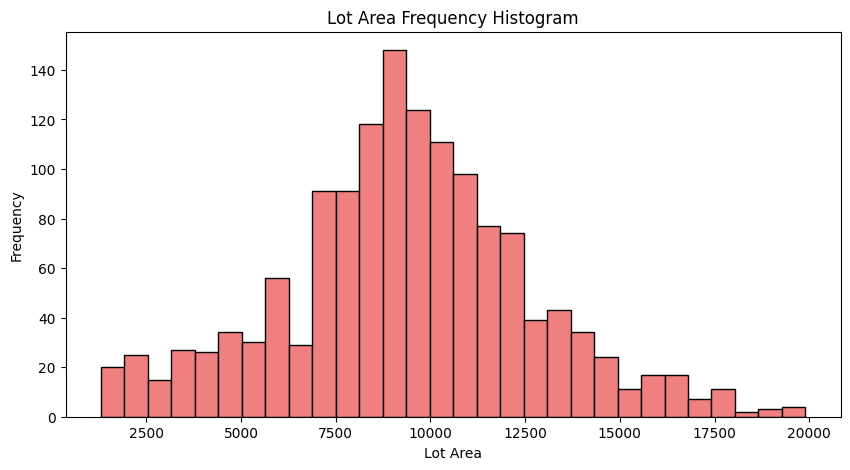

In [75]:
plt.figure(figsize = (10, 5))

plt.hist(df_filtered['LotArea '], color='lightcoral', edgecolor='black', bins=30)

plt.xlabel("Lot Area")
plt.ylabel("Frequency")
plt.title("Lot Area Frequency Histogram")

In [76]:
print(df_filtered['LandContour '].value_counts())

LandContour 
Lvl             1285
Bnk               57
HLS               43
Low               21
Name: count, dtype: int64


Text(0.5, 1.0, 'Mean Sale Price by Land Contour')

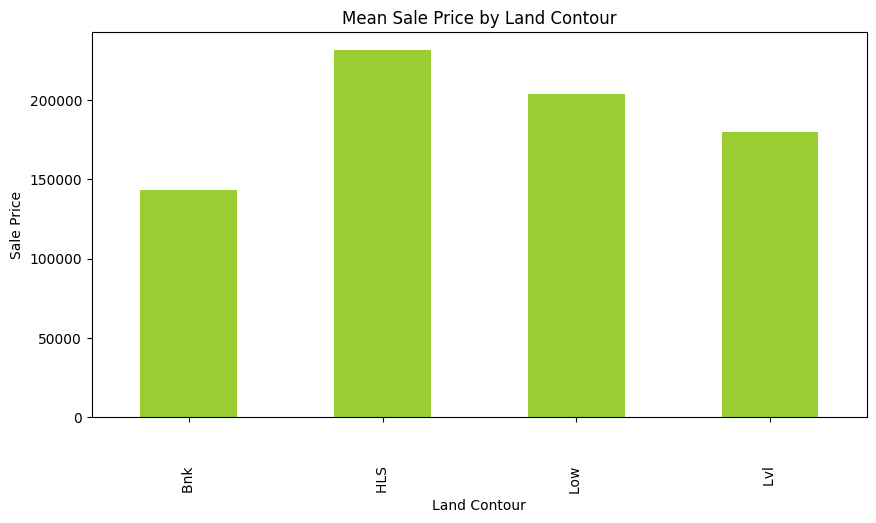

In [77]:
mean_prices = df.groupby('LandContour ')['SalePrice '].mean()

plt.figure(figsize = (10, 5))

mean_prices.plot(kind='bar', color='yellowgreen')

plt.xlabel("Land Contour")
plt.ylabel("Sale Price")
plt.title("Mean Sale Price by Land Contour")

Text(0.5, 1.0, 'Sale Price by Lot Area')

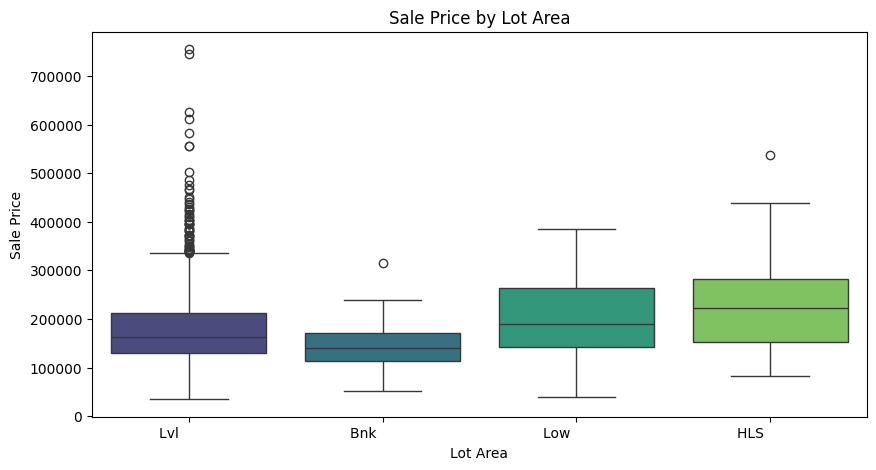

In [78]:
mean_prices = df.groupby('LandContour ')['SalePrice '].mean()

plt.figure(figsize = (10, 5))
sns.boxplot(x='LandContour ', y='SalePrice ', data=df, palette='viridis')

plt.xlabel("Lot Area")
plt.ylabel("Sale Price")
plt.title("Sale Price by Lot Area")

- Only the Lvl value has a certain amount of data and it has a wide variance. So we have to drop this column.

In [79]:
df = df.drop(['LandContour '], axis=1)
X_train_filtered = X_train_filtered.drop(['LandContour '], axis=1)

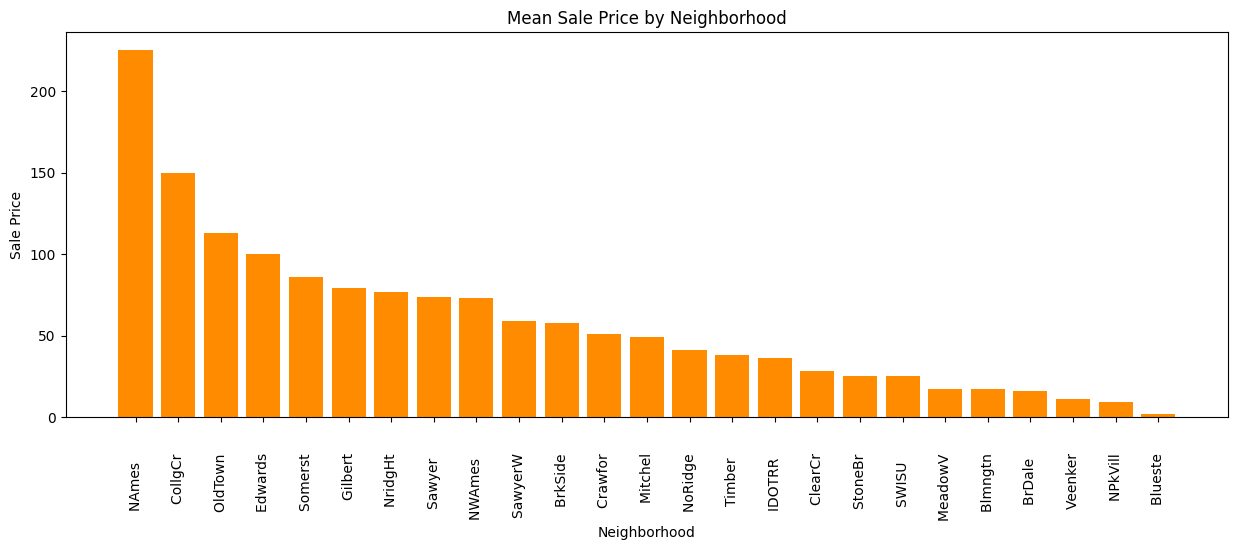

In [80]:
neighborhood_value_counts = df['Neighborhood '].value_counts()

plt.figure(figsize = (15, 5))

plt.bar(neighborhood_value_counts.index, neighborhood_value_counts, color='darkorange')

plt.xlabel("Neighborhood")
plt.xticks(rotation=90)
plt.ylabel("Sale Price")
plt.title("Mean Sale Price by Neighborhood")

plt.show()

- Neighborhood variable has many values, we can group the neighborhoods by region

In [81]:
print(df['OverallCond '].value_counts())

OverallCond 
5    821
6    251
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: count, dtype: int64


Text(0.5, 1.0, 'Mean Sale Price by Overall Condition')

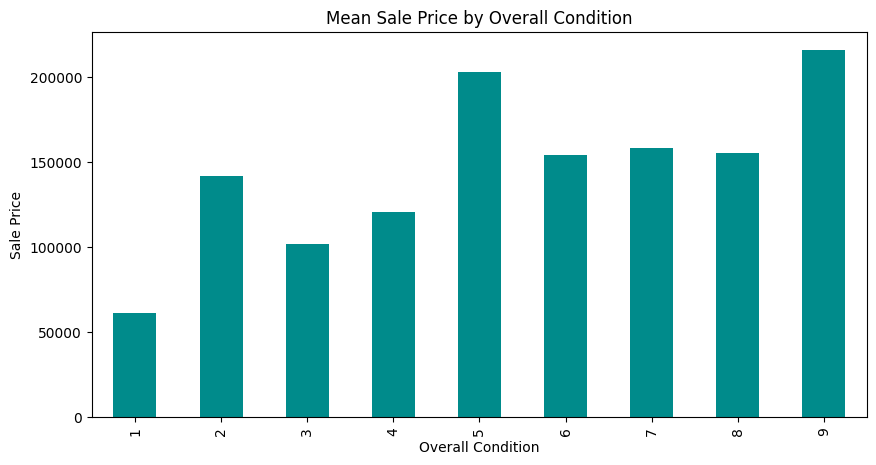

In [82]:
mean_prices = df.groupby('OverallCond ')['SalePrice '].mean()

plt.figure(figsize = (10, 5))

mean_prices.plot(kind='bar', color='darkcyan')

plt.xlabel("Overall Condition")
plt.ylabel("Sale Price")
plt.title("Mean Sale Price by Overall Condition")

- We can group this variable into three groups: below 5, 5 and above 5.

In [83]:
print(df['OverallQual '].value_counts())

OverallQual 
5     396
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: count, dtype: int64


Text(0.5, 1.0, 'Mean Sale Price by Overall Quality')

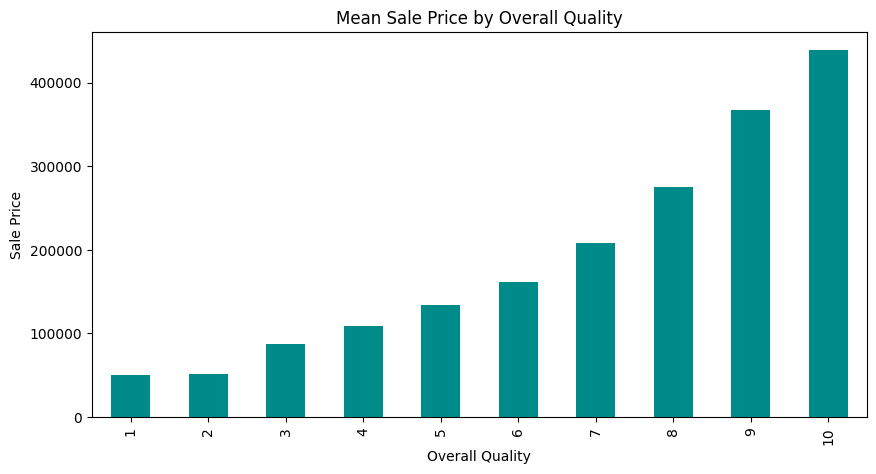

In [84]:
mean_prices = df.groupby('OverallQual ')['SalePrice '].mean()

plt.figure(figsize = (10, 5))

mean_prices.plot(kind='bar', color='darkcyan')

plt.xlabel("Overall Quality")
plt.ylabel("Sale Price")
plt.title("Mean Sale Price by Overall Quality")

- We can group this variable in the same way as the overall condition.

# PREPROCESSING

In [85]:
extra_cols = set(X_test.columns) - set(X_train_filtered.columns)
X_test_filtered = X_test.drop(columns=extra_cols)

print(X_test.head())

   Id     MSSubClass   MSZoning   LotFrontage   LotArea   Street   Alley   \
0   1461           20  RH         80               11622  Pave     NA       
1   1462           20  RL         81               14267  Pave     NA       
2   1463           60  RL         74               13830  Pave     NA       
3   1464           60  RL         78                9978  Pave     NA       
4   1465          120  RL         43                5005  Pave     NA       

   LotShape   LandContour   Utilities   ... ScreenPorch  PoolArea   PoolQC   \
0  Reg        Lvl           AllPub      ...          120         0  NA        
1  IR1        Lvl           AllPub      ...            0         0  NA        
2  IR1        Lvl           AllPub      ...            0         0  NA        
3  IR1        Lvl           AllPub      ...            0         0  NA        
4  IR1        HLS           AllPub      ...          144         0  NA        

   Fence   MiscFeature  MiscVal  MoSold   YrSold   SaleType   

In [86]:
print(X_train_filtered.info()) # 2 variables are categorical, we need to encode them

<class 'pandas.core.frame.DataFrame'>
Index: 1459 entries, 0 to 1459
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   LotArea        1459 non-null   int64 
 1   Neighborhood   1459 non-null   object
 2   OverallQual    1459 non-null   int64 
 3   OverallCond    1459 non-null   int64 
 4   YearBuilt      1459 non-null   int64 
 5   HeatingQC      1459 non-null   object
dtypes: int64(4), object(2)
memory usage: 79.8+ KB
None


In [87]:
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

X_train_filtered[['HeatingQC_Encoded']] = encoder.fit_transform(X_train_filtered[['HeatingQC ']])
X_test_filtered[['HeatingQC_Encoded']] = encoder.transform(X_test[['HeatingQC ']])

print(X_train_filtered['HeatingQC_Encoded'].value_counts())
print(X_train_filtered.head())

HeatingQC_Encoded
0.0    741
3.0    428
2.0    241
1.0     49
Name: count, dtype: int64
   LotArea   Neighborhood   OverallQual   OverallCond   YearBuilt   \
0      8450  CollgCr                   7             5        2003   
1      9600  Veenker                   6             8        1976   
2     11250  CollgCr                   7             5        2001   
3      9550  Crawfor                   7             5        1915   
4     14260  NoRidge                   8             5        2000   

   HeatingQC   HeatingQC_Encoded  
0  Ex                        0.0  
1  Ex                        0.0  
2  Ex                        0.0  
3  Gd                        2.0  
4  Ex                        0.0  


In [88]:
X_train_filtered = X_train_filtered.drop(['HeatingQC '], axis=1)
X_test_filtered = X_test_filtered.drop(['HeatingQC '], axis=1)

In [89]:
def group_neighborhoods(df):
    neighborhood_groups = []

    for neighborhood in df['Neighborhood ']:
        if neighborhood in ['Blmngtn      ', 'BrDale      ', 'BrkSide      ', 'ClearCr      ', 'Gilbert      ', 'NWAmes      ', 'Names      ', 'NoRidge      ', 'NPkVill      ', 'NridgHt      ', 'Somerst      ', 'StoneBr      ', 'Veenker      ']:
            neighborhood_groups.append('North')
        elif neighborhood in ['Blueste      ', 'CollgCr      ', 'Edwards      ', 'NAmes      ', 'OldTown      ', 'SWISU      ', 'Sawyer      ', 'SawyerW      ', 'Timber      ']:
            neighborhood_groups.append('West')
        else:
            neighborhood_groups.append('East')
    
    df['Neighborhood_Group'] = neighborhood_groups

group_neighborhoods(X_train_filtered)
group_neighborhoods(X_test_filtered)

print(X_train_filtered['Neighborhood_Group'].value_counts())

Neighborhood_Group
East     604
North    431
West     424
Name: count, dtype: int64


Text(0.5, 1.0, 'Mean Sale Price by Neighborhood Group')

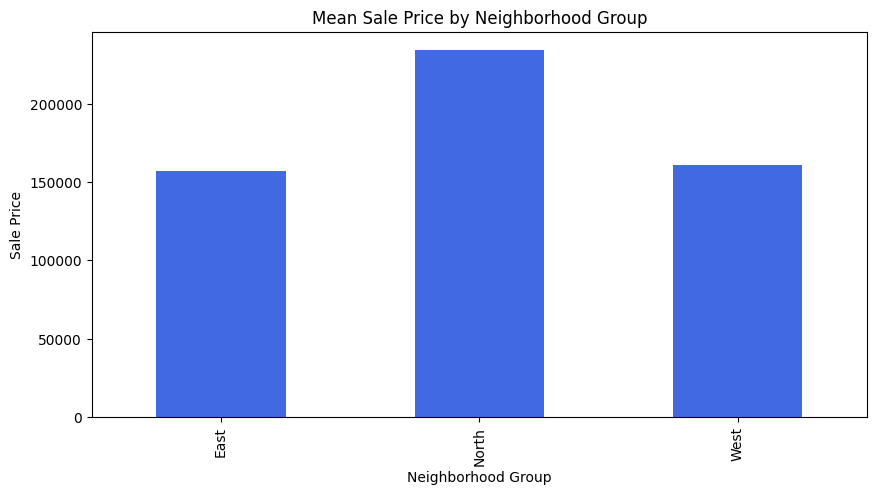

In [90]:
df['Neighborhood_Group'] = X_train_filtered['Neighborhood_Group']

mean_prices = df.groupby('Neighborhood_Group')['SalePrice '].mean()

plt.figure(figsize = (10, 5))

mean_prices.plot(kind='bar', color='royalblue')

plt.xlabel("Neighborhood Group")
plt.ylabel("Sale Price")
plt.title("Mean Sale Price by Neighborhood Group")

In [91]:
X_train_filtered = pd.get_dummies(X_train_filtered, columns=['Neighborhood_Group'], drop_first=True )
X_test_filtered = pd.get_dummies(X_test_filtered, columns=['Neighborhood_Group'], drop_first=True )

print(X_train_filtered.head())

   LotArea   Neighborhood   OverallQual   OverallCond   YearBuilt   \
0      8450  CollgCr                   7             5        2003   
1      9600  Veenker                   6             8        1976   
2     11250  CollgCr                   7             5        2001   
3      9550  Crawfor                   7             5        1915   
4     14260  NoRidge                   8             5        2000   

   HeatingQC_Encoded  Neighborhood_Group_North  Neighborhood_Group_West  
0                0.0                     False                     True  
1                0.0                      True                    False  
2                0.0                     False                     True  
3                2.0                     False                    False  
4                0.0                      True                    False  


In [92]:
X_train_filtered = X_train_filtered.drop(['Neighborhood '], axis=1)
X_test_filtered = X_test_filtered.drop(['Neighborhood '], axis=1)

In [93]:
def map_quality(quality):
    if quality <= 4:
        return 0
    elif quality == 5:
        return 1
    else:
        return 2

X_train_filtered['OverallQual_Encoded'] = X_train_filtered['OverallQual '].apply(map_quality)
X_train_filtered['OverallCond_Encoded'] = X_train_filtered['OverallCond '].apply(map_quality)

X_test_filtered['OverallQual_Encoded'] = X_test_filtered['OverallQual '].apply(map_quality)
X_test_filtered['OverallCond_Encoded'] = X_test_filtered['OverallCond '].apply(map_quality)

print(X_train_filtered['OverallQual_Encoded'].value_counts())
print(X_train_filtered['OverallCond_Encoded'].value_counts())

OverallQual_Encoded
2    922
1    396
0    141
Name: count, dtype: int64
OverallCond_Encoded
1    821
2    550
0     88
Name: count, dtype: int64


In [94]:
X_train_filtered = X_train_filtered.drop(['OverallQual ', 'OverallCond '], axis=1)
X_test_filtered = X_test_filtered.drop(['OverallQual ', 'OverallCond '], axis=1)

print(X_train_filtered.head())

   LotArea   YearBuilt   HeatingQC_Encoded  Neighborhood_Group_North  \
0      8450        2003                0.0                     False   
1      9600        1976                0.0                      True   
2     11250        2001                0.0                     False   
3      9550        1915                2.0                     False   
4     14260        2000                0.0                      True   

   Neighborhood_Group_West  OverallQual_Encoded  OverallCond_Encoded  
0                     True                    2                    1  
1                    False                    2                    2  
2                     True                    2                    1  
3                    False                    2                    1  
4                    False                    2                    1  


In [95]:
X_train_filtered['Age'] = 2010 - X_train_filtered['YearBuilt ']
X_test_filtered['Age'] = 2010 - X_test_filtered['YearBuilt ']

print(X_train_filtered['Age'].value_counts())

Age
4      67
5      64
6      54
3      49
7      45
       ..
135     1
99      1
93      1
138     1
105     1
Name: count, Length: 112, dtype: int64


In [96]:
X_train_filtered = X_train_filtered.drop(['YearBuilt '], axis=1)
X_test_filtered = X_test_filtered.drop(['YearBuilt '], axis=1)

In [97]:
print(X_train_filtered.head())

   LotArea   HeatingQC_Encoded  Neighborhood_Group_North  \
0      8450                0.0                     False   
1      9600                0.0                      True   
2     11250                0.0                     False   
3      9550                2.0                     False   
4     14260                0.0                      True   

   Neighborhood_Group_West  OverallQual_Encoded  OverallCond_Encoded  Age  
0                     True                    2                    1    7  
1                    False                    2                    2   34  
2                     True                    2                    1    9  
3                    False                    2                    1   95  
4                    False                    2                    1   10  


In [98]:
def map_age(age):
    if age <= 30:
        return 2
    elif age <= 58:
        return 1
    else:
        return 0

X_train_filtered['Age_Encoded'] = X_train_filtered['Age'].apply(map_age)
X_test_filtered['Age_Encoded'] = X_test_filtered['Age'].apply(map_age)

print(X_train_filtered['Age_Encoded'].value_counts())

Age_Encoded
2    612
1    504
0    343
Name: count, dtype: int64


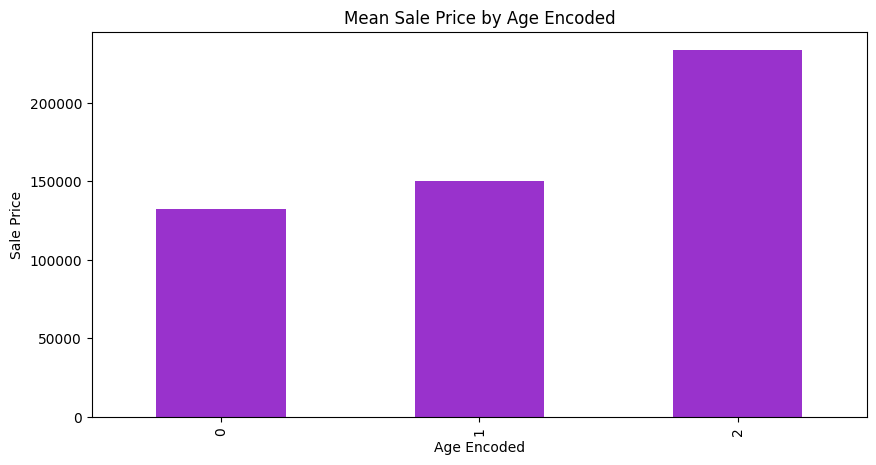

In [99]:
df['Age_Encoded'] = X_train_filtered['Age_Encoded']

mean_prices = df.groupby('Age_Encoded')['SalePrice '].mean()

plt.figure(figsize = (10, 5))

mean_prices.plot(kind='bar', color='darkorchid')

plt.xlabel("Age Encoded")
plt.ylabel("Sale Price")
plt.title("Mean Sale Price by Age Encoded")

plt.show()

In [100]:
X_train_filtered = X_train_filtered.drop(['Age'], axis=1)
X_test_filtered = X_test_filtered.drop(['Age'], axis=1)

In [101]:
print(X_train_filtered.head())

   LotArea   HeatingQC_Encoded  Neighborhood_Group_North  \
0      8450                0.0                     False   
1      9600                0.0                      True   
2     11250                0.0                     False   
3      9550                2.0                     False   
4     14260                0.0                      True   

   Neighborhood_Group_West  OverallQual_Encoded  OverallCond_Encoded  \
0                     True                    2                    1   
1                    False                    2                    2   
2                     True                    2                    1   
3                    False                    2                    1   
4                    False                    2                    1   

   Age_Encoded  
0            2  
1            1  
2            2  
3            0  
4            2  


- We should scale the data in order to normalize it.

In [102]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_filtered)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_filtered.columns)

X_test_scaled = scaler.transform(X_test_filtered)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_filtered.columns)

print(X_train_scaled.head())

   LotArea   HeatingQC_Encoded  Neighborhood_Group_North  \
0 -0.207471          -0.930609                 -0.647503   
1 -0.092243          -0.930609                  1.544393   
2  0.073084          -0.930609                 -0.647503   
3 -0.097253           0.565544                 -0.647503   
4  0.374680          -0.930609                  1.544393   

   Neighborhood_Group_West  OverallQual_Encoded  OverallCond_Encoded  \
0                 1.562382             0.698948            -0.545459   
1                -0.640048             0.698948             1.177105   
2                 1.562382             0.698948            -0.545459   
3                -0.640048             0.698948            -0.545459   
4                -0.640048             0.698948            -0.545459   

   Age_Encoded  
0     1.035376  
1    -0.234047  
2     1.035376  
3    -1.503471  
4     1.035376  


In [103]:
print(X_test_scaled.shape)
print("***********************************************")
print(X_test_scaled.head())

(1459, 7)
***********************************************
   LotArea   HeatingQC_Encoded  Neighborhood_Group_North  \
0  0.110357           1.313620                 -0.647503   
1  0.375382           1.313620                 -0.647503   
2  0.331595           0.565544                  1.544393   
3 -0.054368          -0.930609                  1.544393   
4 -0.552654          -0.930609                  1.544393   

   Neighborhood_Group_West  OverallQual_Encoded  OverallCond_Encoded  \
0                -0.640048            -0.805131             1.177105   
1                -0.640048             0.698948             1.177105   
2                -0.640048            -0.805131            -0.545459   
3                -0.640048             0.698948             1.177105   
4                -0.640048             0.698948            -0.545459   

   Age_Encoded  
0    -0.234047  
1    -0.234047  
2     1.035376  
3     1.035376  
4     1.035376  


# MODELLING

## Linear Regression

In [104]:
lin_reg = LinearRegression()

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=31)

mae_scores = -1 * cross_val_score(lin_reg, X_train_scaled, y_train, scoring='neg_mean_absolute_error', cv=cv)
mse_scores = -1 * cross_val_score(lin_reg, X_train_scaled, y_train, scoring='neg_mean_squared_error', cv=cv)
msle_scores = -1 * cross_val_score(lin_reg, X_train_scaled, y_train, scoring='neg_mean_squared_log_error', cv=cv)

print("Mean Absolute Error: ", mae_scores.mean())
print("Mean Squared Error: ", np.sqrt(mse_scores.mean()))
print("Mean Squared Log Error: ", np.sqrt(msle_scores.mean()))

Mean Absolute Error:  37338.86746179035
Mean Squared Error:  56792.4921237764
Mean Squared Log Error:  0.2593196078910669


## Lasso

### Grid Search

In [105]:
las_reg = Lasso()

alpha_space = np.logspace(-4, 0, 15)
intercept_space = [True, False]

param_grid = {
    'alpha': alpha_space, 
    'fit_intercept': intercept_space
    }

las_grid = GridSearchCV(las_reg, param_grid, cv=cv, scoring='neg_mean_absolute_error')
las_grid.fit(X_train_scaled, y_train)

print("Best Parameters: ", las_grid.best_params_)
print("Best Score: ", las_grid.best_score_)

Best Parameters:  {'alpha': 1.0, 'fit_intercept': True}
Best Score:  -37338.761543789464


### Best Lasso

In [106]:
las_reg_best = Lasso(alpha=las_grid.best_params_['alpha'], fit_intercept=las_grid.best_params_['fit_intercept'])

mae_scores = -1 * cross_val_score(las_reg_best, X_train_scaled, y_train, scoring='neg_mean_absolute_error', cv=cv)
mse_scores = -1 * cross_val_score(las_reg_best, X_train_scaled, y_train, scoring='neg_mean_squared_error', cv=cv)
msle_scores = -1 * cross_val_score(las_reg_best, X_train_scaled, y_train, scoring='neg_mean_squared_log_error', cv=cv)

print("Mean Absolute Error: ", mae_scores.mean())
print("Mean Squared Error: ", np.sqrt(mse_scores.mean()))
print("Mean Squared Log Error: ", np.sqrt(msle_scores.mean()))

Mean Absolute Error:  37338.761543789464
Mean Squared Error:  56792.43998929843
Mean Squared Log Error:  0.2593178929952398


## XGBoost

### Grid Search

In [112]:
xgboost = XGBRegressor()

param_grid = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

xgboost_grid = GridSearchCV(xgboost, param_grid, cv=cv, scoring='neg_mean_absolute_error')
xgboost_grid.fit(X_train_scaled, y_train)

print("Best Parameters: ", xgboost_grid.best_params_)
print("Best Score: ", xgboost_grid.best_score_)

Best Parameters:  {'colsample_bytree': 0.8, 'gamma': 0.5, 'max_depth': 3, 'min_child_weight': 10, 'subsample': 1.0}
Best Score:  -32287.58369990331


### Best XGBoost

In [113]:
xgboost_best = XGBRegressor(**xgboost_grid.best_params_)

mae_scores = -1 * cross_val_score(xgboost_best, X_train_scaled, y_train, scoring='neg_mean_absolute_error', cv=cv)
mse_scores = -1 * cross_val_score(xgboost_best, X_train_scaled, y_train, scoring='neg_mean_squared_error', cv=cv)
msle_scores = -1 * cross_val_score(xgboost_best, X_train_scaled, y_train, scoring='neg_mean_squared_log_error', cv=cv)

print("Mean Absolute Error: ", mae_scores.mean())
print("Mean Squared Error: ", np.sqrt(mse_scores.mean()))
print("Mean Squared Log Error: ", np.sqrt(msle_scores.mean()))

Mean Absolute Error:  32287.58369990331
Mean Squared Error:  51507.46234403954
Mean Squared Log Error:  0.2305607252170013


# Result

In [118]:
xgboost_best.fit(X_train_scaled, y_train)
predictions = xgboost_best.predict(X_test_scaled)

submission = pd.DataFrame({'Id': X_test['Id   '], 'SalePrice': predictions})
submission.to_csv('submission.csv', index=False)

print(submission.head())

     Id      SalePrice
0  1461  156581.640625
1  1462  228073.703125
2  1463  165806.625000
3  1464  280179.937500
4  1465  235008.781250
